In [1]:
import pandas as pd

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Define dataset directory
import os
dataset_path = "/content/drive/MyDrive/archive(1)"

# Subfolder paths
defected_path = os.path.join(dataset_path, "defected")  # Cracked images
no_defected_path = os.path.join(dataset_path, "no_defected")  # Non-cracked images



In [6]:
defected_path

'/content/drive/MyDrive/archive(1)/defected'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import os
print(os.listdir("/content/drive/MyDrive"))  # Check folder names


['Colab Notebooks', 'Rohit_Bind_CloudEagle).pdf', 'RohitBind_BITSPilani - (4).pdf', 'Classroom', 'Books', 'Academic requirements', 'Dataset13.docx', 'dataset13.docx', 'Projects', 'Workbook_Expt06 (2).docx', 'Lecture 3.pdf', 'GC-Lecture 8-2021-22.pdf', 'Lecture 29.pdf', 'Lecture 25.pdf', 'Lecture 5-2021-22.pdf', 'Lecture 24.pdf', 'Lecture  12.pdf', 'Lecture 2-2021-22.pdf', 'Lecture 27.pdf', 'Lecture 20.pdf', 'GC-Lecture 4-2021-22.pdf', 'Lecture 19.pdf', 'Lecture 17.pdf', 'Lecture  13.pdf', 'Lecture  15.pdf', 'Lecture 31.pdf', 'Lecture 21.pdf', 'Lecture 23.pdf', 'Lecture 26.pdf', 'Lecture 6-2021-22.pdf', 'Lecture 1-2021-22.pdf', 'Lecture 9-2021-22.pdf', 'Lecture 32.pdf', 'Lecture 22.pdf', 'Lecture 10-2021-22.pdf', 'Lecture 33.pdf', 'Lecture  14.pdf', 'Lecture 28.pdf', 'Lecture 18.pdf', 'Lecture 16.pdf', 'Lecture 11-2021-22.pdf', 'Lecture 7-2021-22.pdf', 'Lecture 30.pdf', 'Set13.docx', 'Rohit bind', 'Mathematics 2 Course Quiz - 2 Attempt Review.pdf', 'CP_Lab_Test_Marks_Posted_8-8-22-1.xls

In [8]:
dataset_path = "/content/drive/MyDrive/Colab Notebooks/archive (1)"
print(os.listdir(dataset_path))  # Check if 'defected' and 'no_defected' exist


['defected', 'no_defected']


In [9]:
defected_path = os.path.join(dataset_path, "defected")
no_defected_path = os.path.join(dataset_path, "no_defected")

print("Defected images:", len(os.listdir(defected_path)))
print("No Defected images:", len(os.listdir(no_defected_path)))


Defected images: 759
No Defected images: 798


In [10]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [11]:
# Function to load images from a folder
def load_images_from_folder(folder, label, num_images=None):
    images, labels = [], []

    file_list = os.listdir(folder)
    if num_images:
        file_list = file_list[:num_images]  # Limit dataset if needed

    for filename in file_list:
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (128, 128))  # Resize images
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            images.append(img)
            labels.append(label)  # 1 for defected, 0 for no_defected

    return images, labels

# Load images from both folders
defected_images, defected_labels = load_images_from_folder(defected_path, label=1)
no_defected_images, no_defected_labels = load_images_from_folder(no_defected_path, label=0)

# Combine data
all_images = np.array(defected_images + no_defected_images) / 255.0  # Normalize
all_labels = np.array(defected_labels + no_defected_labels)

print(f"Total images: {all_images.shape[0]}, Shape: {all_images.shape[1:]}")


Total images: 1557, Shape: (128, 128, 3)


In [18]:
all_images.shape

(1557, 128, 128, 3)

In [19]:
all_labels.shape

(1557,)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)

print(f"Training Data: {X_train.shape[0]}, Testing Data: {X_test.shape[0]}")


Training Data: 1245, Testing Data: 312


In [21]:
# Define CNN Model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Output layer (Binary Classification)
])

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)


Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.7140 - loss: 0.4951 - val_accuracy: 0.9744 - val_loss: 0.0744
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.9810 - loss: 0.0733 - val_accuracy: 1.0000 - val_loss: 0.0110
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 1.0000 - loss: 0.0079 - val_accuracy: 1.0000 - val_loss: 3.2116e-04
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 1.0000 - loss: 9.2458e-04 - val_accuracy: 1.0000 - val_loss: 1.3784e-04
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 1.0000 - loss: 4.4134e-04 - val_accuracy: 1.0000 - val_loss: 3.1996e-05
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 1.0000 - loss: 3.1987e-04 - val_accuracy: 1.0000 - val_loss: 1.2183e-05
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 1.0000 - loss: 9.7827e-05 - val_accuracy: 1.0000 - val_loss: 7.6204e-06
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 1.0000 - loss: 1.065

In [27]:
model.save('CNN_crack_detection_model.keras')

In [28]:
from google.colab import files
files.download('CNN_crack_detection_model.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 491ms/step - accuracy: 1.0000 - loss: 9.0465e-06

Test Accuracy: 1.0000


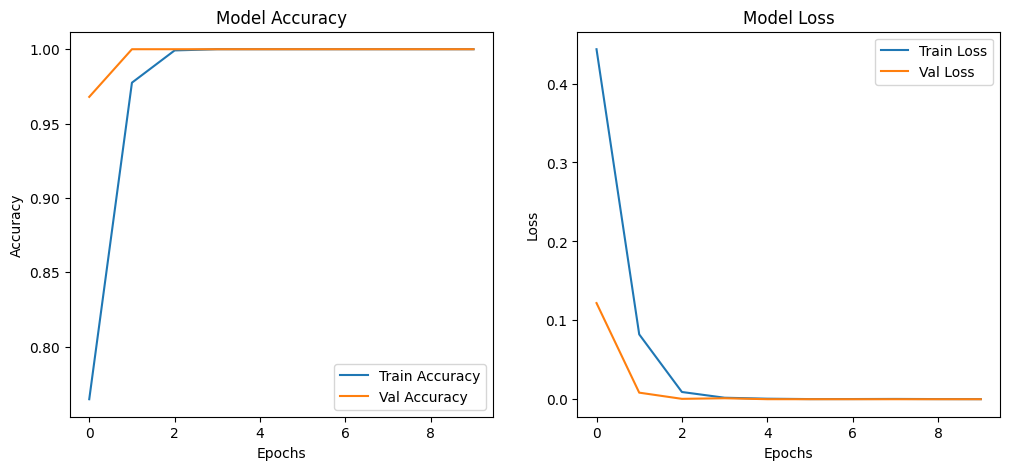

In [ ]:
# Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy")

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss")

plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()

for filename in uploaded.keys():
    img = cv2.imread(filename)
    img = cv2.resize(img, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    prediction = model.predict(img)
    result = "Defected" if prediction[0][0] > 0.5 else "No Defected"

    plt.imshow(cv2.imread(filename))
    plt.title(f"Predicted: {result}")
    plt.axis("off")
    plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 437ms/step - accuracy: 1.0000 - loss: 9.0465e-06

Test Accuracy: 1.0000
Test Loss: 0.0000


In [ ]:
model_1= model.evaluate(X_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 345ms/step - accuracy: 1.0000 - loss: 9.0465e-06


In [ ]:
y_pred= model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 236ms/step


In [ ]:
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 235ms/step


0 → Not Defected (No Defect) ✅
1 → Defected (Has a Crack or Defect) ❌

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 255ms/step - accuracy: 1.0000 - loss: 9.0465e-06

Test Accuracy: 1.0000
Test Loss: 0.0000
